In [68]:
# Alle Variablen löschen ohne zu fragen.
# Hierdurch werden Seiteneffekte vermieden.
%reset -f

In [69]:
import matplotlib.pyplot as plt
import numpy             as np

# Aufgabenstellung 1

In [97]:
# Parameter
h         = 0.003  # Schrittweite
x_end     = 0.2

In [98]:
# Anlegen der Ergebnisarrays
steps = int(x_end/h)
print('steps =', steps)

x       = np.zeros(steps)  # Array für unabhängige Variable
y_euler = np.zeros(steps)  # Output für abhängige Variable (berechnet mit Euler)
y_euler_imp = np.zeros(steps)  # Output für abhängige Variable (berechnet mit Euler)
y_RK2   = np.zeros(steps)  # Output für abhängige Variable (berechnet mit RK2)
y_anay  = np.zeros(steps)  # Output für abhängige Variable (berechnet mit RK2)

steps = 66


In [99]:
# Initialisierung des Anfangswertes
y_euler[0] = 1
y_euler_imp[0] = 1
y_anay[0]   = 1
y_RK2[0]   = 1
x[0]       = 0

steps       = 65
range_steps = range(0, 65)


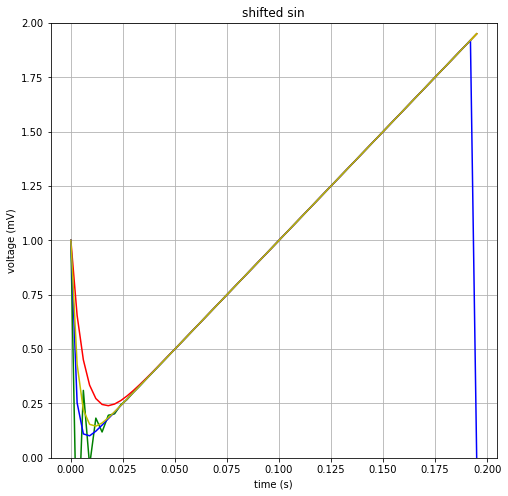

In [102]:
# Data for plotting
def y_dot(x,y):
    return 10-500*y+5000*x

# Euler-Iteration

print('steps       =',steps-1)
print('range_steps =',range(steps-1))

# jetzt mit Euler die 
for i in range(steps-1) :
    y_euler[i+1] = y_euler[i] + h * y_dot(x[i], y_euler[i])
    x[i+1]       = x[i] + h

    
x       = np.zeros(steps)
# jetzt mit analytischer Lösung die 
for i in range(steps-1) :
    y_anay[i] = 10*x[i]+np.exp((-500*x[i]))
    x[i+1]       = x[i] + h



x       = np.zeros(steps)
# jetzt mit RK2 die 
for i in range(steps-1) :
    k1 = h * y_dot(x[i], y_RK2[i])
    k2 = h * y_dot((x[i]+(h/2)), (y_RK2[i]+(k1/2)))
    
    y_RK2[i+1]  = y_RK2[i] + k2
    
    x[i+1]       = x[i] + h
    
x       = np.zeros(steps)
# jetzt mit impliziter Euler die 
for i in range(steps-1) :
    x[i+1]       = x[i] + h
    y_euler_imp[i+1] = (y_euler_imp[i]+h*y_dot(x[i+1],0))/(1+(h*500))

    
# Note that using plt.subplots below is equivalent to using
# fig = plt.figure() and then ax = fig.add_subplot(111)
fig, ax = plt.subplots(figsize=(8,8))
ax.set_ylim([0,2])
ax.plot( x, y_euler,'g')
ax.plot( x, y_RK2,'r')
ax.plot( x, y_anay,'b')
ax.plot( x, y_euler_imp,'y')

ax.set(xlabel='time (s)', ylabel='voltage (mV)', title='shifted sin')
ax.grid()

fig.savefig("test.png")
plt.show()